In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\boluw\PYTHON\Visualisations With Python\Africa_climate_change.csv")


In [ ]:
df.head()

In [ ]:
df.info()

In [11]:
df["TAVG"] = df["TAVG"].fillna((df["TMAX"] + df["TMIN"])/2)

# Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

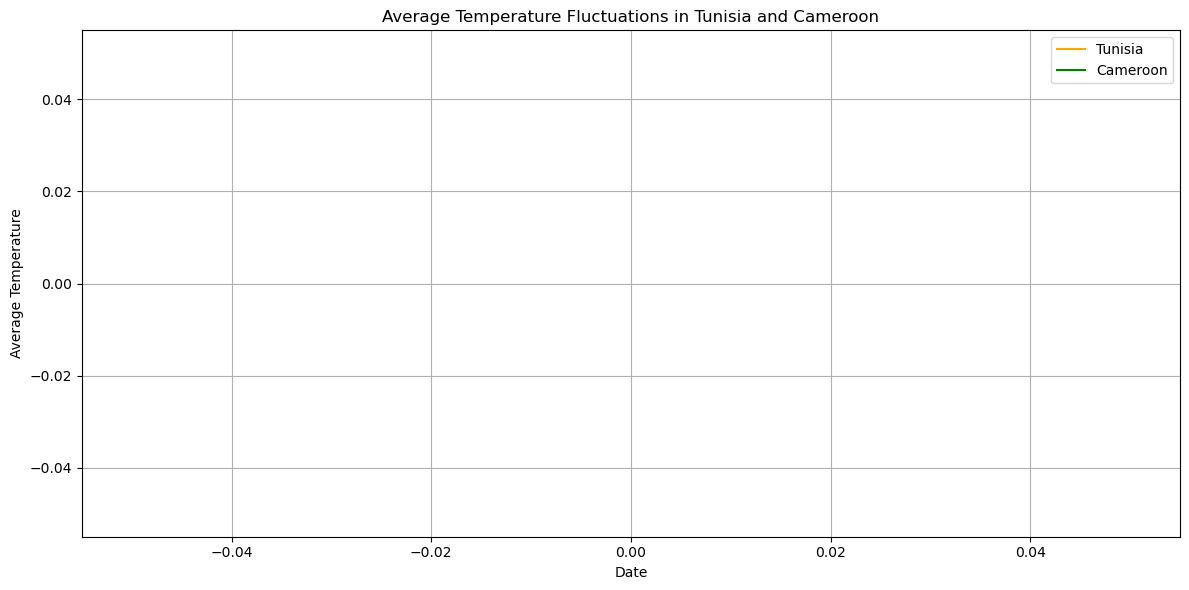

In [15]:
import matplotlib.pyplot as plt

# Filter for Tunisia and Cameroon
tunisia_df = df[df["COUNTRY"] == "TUNISIA"]
cameroon_df = df[df["COUNTRY"] == "CAMEROON"]

# Group by DATE and calculate mean temperature (TAVG)
tunisia_avg = tunisia_df.groupby("DATE")["TAVG"].mean()
cameroon_avg = cameroon_df.groupby("DATE")["TAVG"].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tunisia_avg.index, tunisia_avg.values, label="Tunisia", color="orange")
plt.plot(cameroon_avg.index, cameroon_avg.values, label="Cameroon", color="green")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature Fluctuations in Tunisia and Cameroon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Zoom in to only include data between 1980 and 2005, try to customize the axes labels

In [17]:
# Filter the DataFrame for years between 1980 and 2005
df["DATE"] = pd.to_datetime(df["DATE"])
filtered_df = df[(df["DATE"].dt.year >= 1980) & (df["DATE"].dt.year <= 2005)]

# Display the first few rows to confirm
print(filtered_df[["DATE", "COUNTRY", "TAVG"]].head())


        DATE   COUNTRY  TAVG
0 1980-01-01   Tunisia  54.0
1 1980-01-01   Tunisia  49.0
2 1980-01-01  Cameroon  72.0
3 1980-01-01   Tunisia  50.0
4 1980-01-01  Cameroon  75.0


### Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

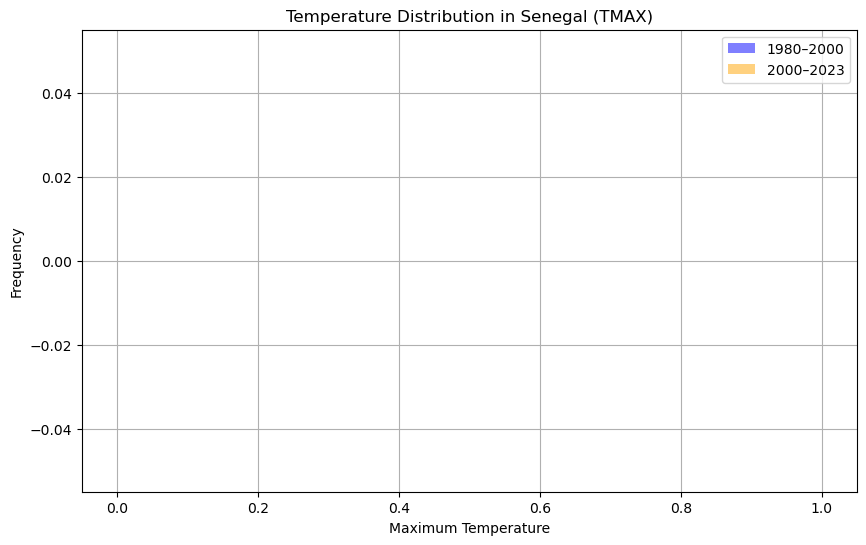

In [19]:
import matplotlib.pyplot as plt

# Filter data for Senegal
senegal_df = df[df["COUNTRY"] == "SENEGAL"]

# Convert DATE column to datetime if not already
senegal_df["DATE"] = pd.to_datetime(senegal_df["DATE"])

# Filter into two periods
sen_1980_2000 = senegal_df[(senegal_df["DATE"].dt.year >= 1980) & (senegal_df["DATE"].dt.year <= 2000)]
sen_2000_2023 = senegal_df[(senegal_df["DATE"].dt.year > 2000) & (senegal_df["DATE"].dt.year <= 2023)]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(sen_1980_2000["TMAX"].dropna(), bins=30, alpha=0.5, label="1980–2000", color="blue")
plt.hist(sen_2000_2023["TMAX"].dropna(), bins=30, alpha=0.5, label="2000–2023", color="orange")

plt.title("Temperature Distribution in Senegal (TMAX)")
plt.xlabel("Maximum Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### Select the best chart to show the Average temperature per country.

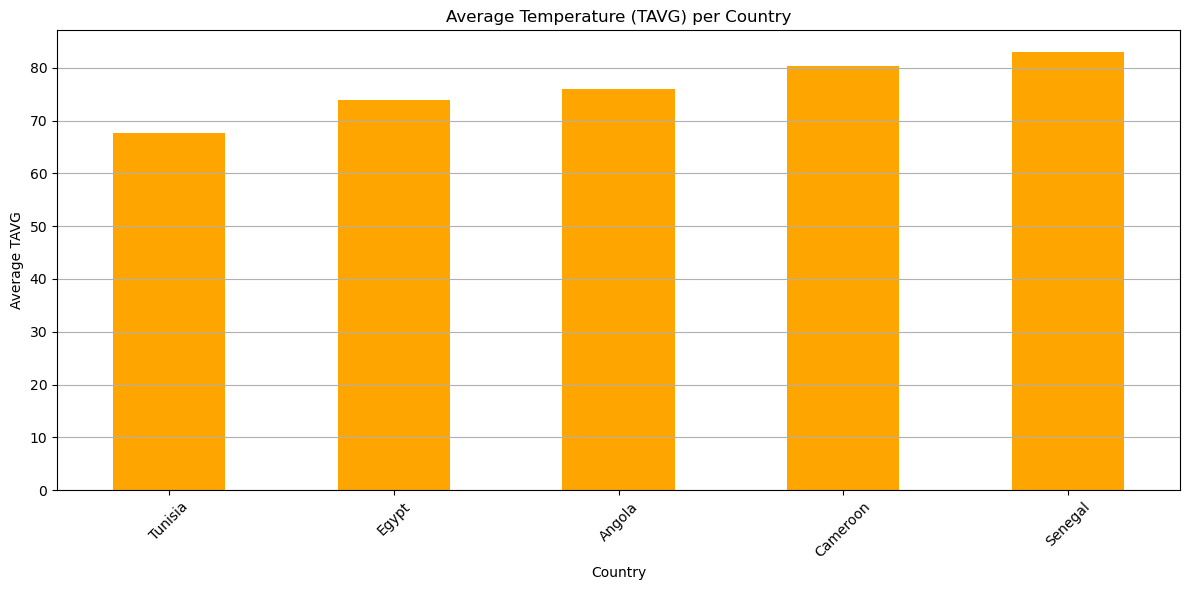

In [30]:
import matplotlib.pyplot as plt

# Group by country and calculate average TAVG
avg_tavg = df.groupby("COUNTRY")["TAVG"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_tavg.plot(kind='bar', color='orange')
plt.title("Average Temperature (TAVG) per Country")
plt.xlabel("Country")
plt.ylabel("Average TAVG")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
